In [1]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer

# tf.keras.utils.set_random_seed(42)
print(tf.__version__)

2024-03-19 11:36:10.045420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [2]:
print(np.__version__)

1.23.5


In [2]:
x = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
y = np.array([-3, -1, 1, 3, 5, 7], dtype=float)
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# sgd = stochastic gradient descent
model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(x, y, epochs=500)  # epochs = number of iterations
print(model.predict([10.0]))

2024-03-19 09:11:14.100629: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-19 09:11:14.102080: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 09:11:14.104262: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-03-19 09:11:14.262051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-03-19 09:11:14.289477: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/500
1/1 [==============================] - 1s 757ms/step - loss: 54.4447
Epoch 2/500
1/1 [==============================] - 0s 22ms/step - loss: 43.2452
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 34.4256
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 27.4785
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 22.0047
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 17.6903
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 14.2882
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 11.6039
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 9.4846
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 7.8100
Epoch 11/500
1/1 [==============================] - 0s 20ms/step - loss: 6.4853
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 5.4361
Epoch 13/500
1/1 [=============================

Imagine that house pricing is as easy as:

A house has a base cost of 50k, and every additional bedroom adds a cost of 50k. This will make a 1 bedroom house cost 100k, a 2 bedroom house cost 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.


In [3]:
def house_model():
    # START CODE HERE

    # Define input and output tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember to explictly set the dtype as float
    xs = np.array([1, 2, 3, 4, 5, 6], dtype=float)
    ys = 50 + 50 * xs

    # Define your model (should be a model with 1 dense layer and 1 unit)
    # Note: you can use `tf.keras` instead of `keras`
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

    # Compile your model
    # Set the optimizer to Stochastic Gradient Descent
    # and use Mean Squared Error as the loss function
    model.compile(optimizer="sgd", loss="mean_squared_error")

    # Train your model for 1000 epochs by feeding the i/o tensors
    model.fit(xs, ys, epochs=1000)

    # END CODE HERE
    return model


model = house_model()

new_x = 7.0
prediction = model.predict([new_x])[0]
print(prediction)

Epoch 1/1000
1/1 [==============================] - 0s 378ms/step - loss: 58238.0352
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 27088.6719
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 12670.8311
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 5996.8501
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 2906.9675
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 1475.9181
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 812.6358
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 504.7043
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 361.2481
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 293.9222
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 261.8383
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 246.0725
Epoch 13/100

## Computer Vision

In [3]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

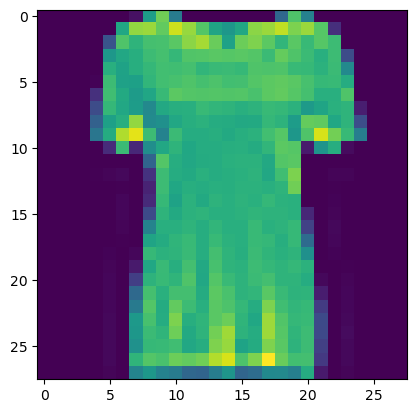

In [5]:
# Visualize the image
index = 10

plt.imshow(training_images[index])

plt.show()

In [9]:
training_images[index].shape, training_labels[index]

((28, 28), 0)

In [6]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [11]:
# Build the classification model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)


model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(training_images, training_labels, epochs=5)

2024-03-15 10:48:09.752474: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 52s 25ms/step - loss: 0.4909 - accuracy: 0.8268
Epoch 2/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3692 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3334 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3090 - accuracy: 0.8872
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2920 - accuracy: 0.8912


In [12]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 10ms/step - loss: 0.3687 - accuracy: 0.8667


[0.36871856451034546, 0.8666999936103821]

In [14]:
classifications = model.predict(test_images)

print(np.argmax(classifications[0]))

313/313 [==============================] - 3s 9ms/step
9


In [10]:
print(test_labels[0])

9


## Callbacks

Helps determine the number of epochs 

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training when the loss falls below 0.4

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if (logs.get('loss') < 0.4):

            # Stop if threshold is met
            print("\nLoss is lower than 0.4 so cancelling training!")
            self.model.stop_training = True


# Instantiate class
callbacks = myCallback()


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with a callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4764 - accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3606 - accuracy: 0.8686
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3606 - accuracy: 0.8686


In [13]:
# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the correct function signature for on_epoch_end
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") is not None and logs.get("accuracy") > 0.89:
            print("\nReached 89% accuracy so cancelling training!")

            # Stop training once the above condition is met
            self.model.stop_training = True


def train_mnist(x_train, y_train):

    # START CODE HERE

    # Instantiate the callback class
    callbacks = myCallback()

    # Define the model
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax),
        ]
    )

    # Compile the model
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    # END CODE HERE

    return history


hist = train_mnist(training_images, training_labels)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4751 - accuracy: 0.8303
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3579 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3223 - accuracy: 0.8818
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3000 - accuracy: 0.8878
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8968
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2809 - accuracy: 0.8967


## Convolution

Extraction features in the image and applying pooling compresses the image

In [15]:
# Define the model
model = tf.keras.models.Sequential(
    [
        # Add convolutions and max pooling
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Add the same layers as before
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

# Print the model summary
model.summary()

# Use same settings
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model
print(f"\nMODEL TRAINING:")
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f"\nMODEL EVALUATION:")
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

2024-03-15 11:12:14.960721: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 134s 67ms/step - loss: 0.4677 - accuracy: 0.8304
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3152 - accuracy: 0.8860
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2737 - accuracy: 0.8985
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2435 - accuracy: 0.9094
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2208 - accuracy: 0.9178

MODEL EVALUATION:
313/313 [==============================] - 4s 10ms/step - loss: 0.2815 - accuracy: 0.8971


## Visualizing the Convolutions and Pooling

In [19]:
for layer in model.layers:
    print(layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 32), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 32), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 32), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 800), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_3/Relu:0', description="created by layer 'dense_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), 

In [20]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 800) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_3')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_4')>]

In [21]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [22]:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

activation_model

In [38]:
au = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))

au[6].shape  # = np.array(au)

1/1 [==============================] - 0s 213ms/step


(1, 10)

In [16]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 52ms/step


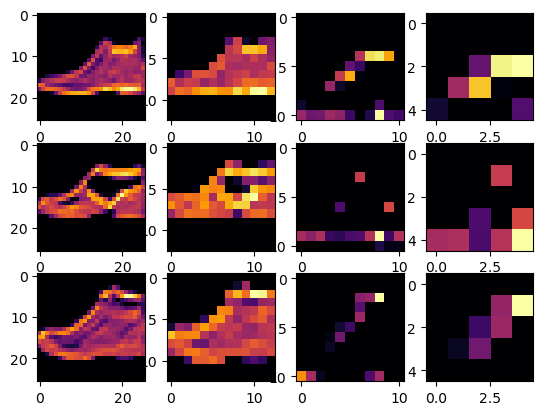

In [40]:
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)

# select shoes
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 11  # goes to 32 for this example

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(
    inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(
        test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[0, x].grid(False)

    f2 = activation_model.predict(
        test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[1, x].grid(False)

    f3 = activation_model.predict(
        test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap="inferno")
    axarr[2, x].grid(False)

/tmp/ipykernel_397649/2835673717.py:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent_image = ascent()


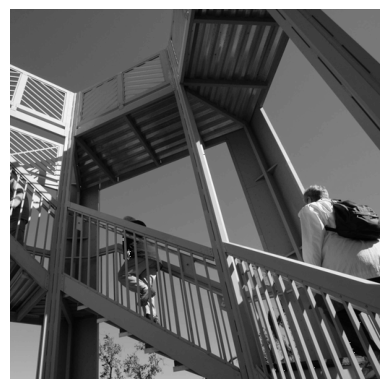

In [42]:
from scipy.misc import ascent

# load the ascent image
ascent_image = ascent()

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis("off")
plt.imshow(ascent_image)
plt.show()

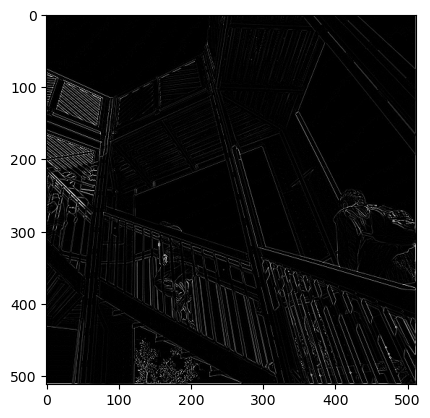

In [43]:
# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

# Experiment with different values and see the effect
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight = 1

# Iterate over the image
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1, y] * filter[0][1])
        convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])
        convolution = convolution + (ascent_image[x, y-1] * filter[1][0])
        convolution = convolution + (ascent_image[x, y] * filter[1][1])
        convolution = convolution + (ascent_image[x, y+1] * filter[1][2])
        convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])
        convolution = convolution + (ascent_image[x+1, y] * filter[2][1])
        convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])

        # Multiply by weight
        convolution = convolution * weight

        # Check the boundaries of the pixel values
        if (convolution < 0):
            convolution = 0
        if (convolution > 255):
            convolution = 255

        # Load into the transformed image
        image_transformed[x, y] = convolution


# Plot the image
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()

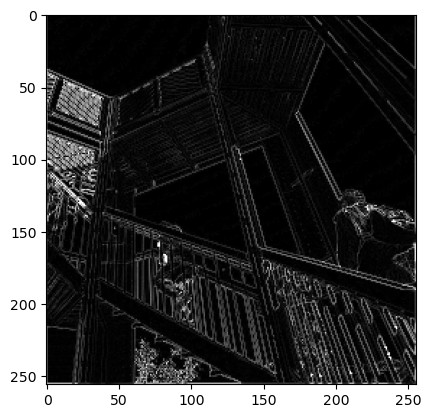

In [44]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):

        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Get only the largest value and assign to the reduced image
        newImage[int(x/2), int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

## Image Augementation

* use imagedatagenerator to 

In [18]:
# import zipfile

# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
# # Unzip the dataset
# local_zip = "./horse-or-human.zip"
# zip_ref = zipfile.ZipFile(local_zip, "r")
# zip_ref.extractall("./horse-or-human")
# zip_ref.close()



# # Unzip validation set
# local_zip = "./validation-horse-or-human.zip"
# zip_ref = zipfile.ZipFile(local_zip, "r")
# zip_ref.extractall("./validation-horse-or-human")

# zip_ref.close()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1 / 255)
validation_datagen = ImageDataGenerator(rescale=1 / 255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)


# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    # This is the source directory for validation images
    "./validation-horse-or-human/",
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=32,
    # Since you use binary_crossentropy loss, you need binary labels
    class_mode="binary",
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [3]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)


model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


history = model.fit(
    train_generator,
    steps_per_epoch=8,  # 1027 images = batch_size * steps_per_epoch
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8,  # 256 images = batch_size * steps_per_epoch
)

Epoch 1/100


2024-03-18 09:45:54.977781: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2024-03-18 09:45:55.237210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-18 09:45:59.830217: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 138240000 exceeds 10% of free system memory.
2024-03-18 09:46:00.045743: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.
2024-03-18 09:46:01.234093: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 181870592 exceeds 10% of free system memory.
2024-03-18 09:46:01.717638: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 354041856 exceeds 1

8/8 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.5328 

2024-03-18 09:47:53.565522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 124s 14s/step - loss: 0.7017 - accuracy: 0.5328 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 112s 14s/step - loss: 0.6439 - accuracy: 0.5967 - val_loss: 0.4331 - val_accuracy: 0.7852
Epoch 3/100
8/8 [==============================] - 139s 18s/step - loss: 0.7475 - accuracy: 0.6151 - val_loss: 1.3953 - val_accuracy: 0.5234
Epoch 4/100
8/8 [==============================] - 102s 15s/step - loss: 0.4774 - accuracy: 0.8076 - val_loss: 0.9847 - val_accuracy: 0.5977
Epoch 5/100
8/8 [==============================] - 71s 9s/step - loss: 0.2918 - accuracy: 0.8854 - val_loss: 2.7509 - val_accuracy: 0.6641
Epoch 6/100
8/8 [==============================] - 70s 9s/step - loss: 0.2264 - accuracy: 0.8966 - val_loss: 1.7912 - val_accuracy: 0.7891
Epoch 7/100
8/8 [==============================] - 97s 12s/step - loss: 0.1977 - accuracy: 0.9141 - val_loss: 1.8174 - val_accuracy: 0.7891
Epoch 8/100
8/8 [=============

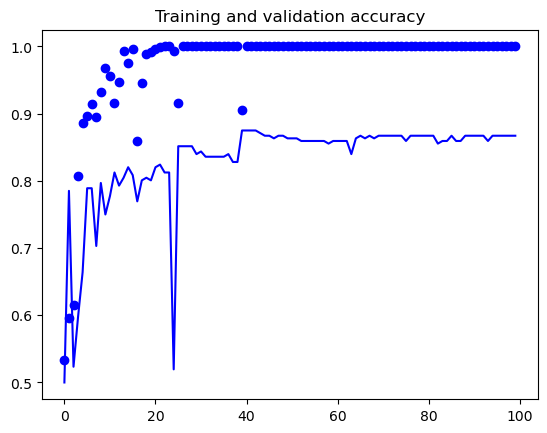

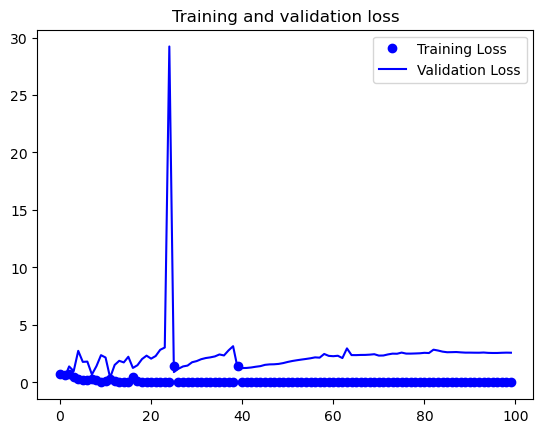

In [5]:
def plot_loss_acc(history):
    """Plots the training and validation loss and accuracy from a history object"""
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()


plot_loss_acc(history)

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

# Limited Data - Overfitting

For limited data, one can consider doing one of the following:
* data augmentation
* transfer learning

## Data Augmentation

In [48]:
# Create new model
model_for_aug = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_for_aug.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    # This is the source directory for validation images
    "./validation-horse-or-human/",
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=32,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/20


2024-03-15 13:45:01.378608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - ETA: 0s - loss: 0.7528 - accuracy: 0.5617 

2024-03-15 13:48:11.391390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 197s 22s/step - loss: 0.7528 - accuracy: 0.5617 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 147s 18s/step - loss: 0.6953 - accuracy: 0.5072 - val_loss: 0.6845 - val_accuracy: 0.9219
Epoch 3/20
8/8 [==============================] - 143s 18s/step - loss: 0.6871 - accuracy: 0.5228 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 128s 16s/step - loss: 0.6857 - accuracy: 0.5850 - val_loss: 0.6654 - val_accuracy: 0.6523
Epoch 5/20
8/8 [==============================] - 131s 16s/step - loss: 0.7127 - accuracy: 0.5918 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 114s 14s/step - loss: 0.6728 - accuracy: 0.5795 - val_loss: 0.7394 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 120s 14s/step - loss: 0.6613 - accuracy: 0.6040 - val_loss: 0.6819 - val_accuracy: 0.5078
Epoch 8/20
8/8 [===============

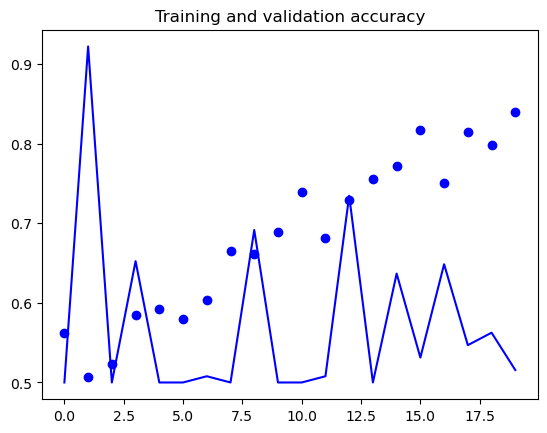

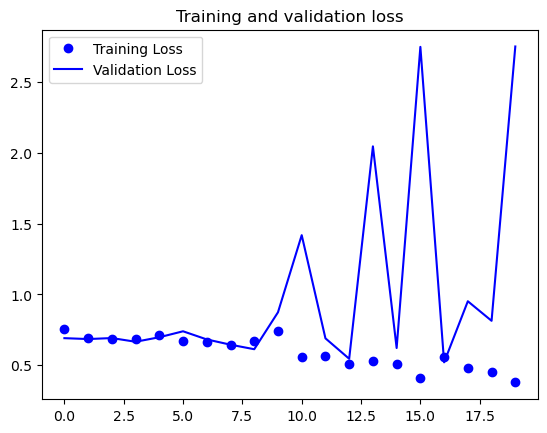

In [49]:
plot_loss_acc(history_with_aug)

the training accuracy has gone down compared to the baseline. This is expected because (as a result of data augmentation) there are more variety in the images so the model will need more runs to learn from them. The good thing is the validation accuracy is no longer stalling and is more in line with the training results. This means that the model is now performing better on unseen data.

In [50]:
import numpy as np

# from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import os
import glob

validation_horse_dir = os.path.join("./validation-horse-or-human/horses")
validation_horse_hames = os.listdir(validation_horse_dir)

for fn in validation_horse_hames:

    # predicting images
    path = os.path.join(validation_horse_dir, fn)
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

1/1 [==============================] - 1s 1s/step
[0.64042574]
horse5-060.png is a human
1/1 [==============================] - 0s 282ms/step
[0.00187918]
horse1-510.png is a horse
1/1 [==============================] - 0s 189ms/step
[1.2679947e-06]
horse6-198.png is a horse
1/1 [==============================] - 0s 151ms/step
[0.9335566]
horse5-259.png is a human
1/1 [==============================] - 0s 129ms/step
[3.0007143e-11]
horse3-584.png is a horse
1/1 [==============================] - 0s 166ms/step
[0.79877293]
horse4-389.png is a human
1/1 [==============================] - 0s 141ms/step
[9.4762785e-05]
horse1-122.png is a horse
1/1 [==============================] - 0s 195ms/step
[0.00034433]
horse4-000.png is a horse
1/1 [==============================] - 0s 129ms/step
[0.9999763]
horse2-136.png is a human
1/1 [==============================] - 0s 162ms/step
[0.13617222]
horse5-018.png is a horse
1/1 [==============================] - 0s 129ms/step
[8.416715e-09]
horse1-2

In [29]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

# Directory with validation horse pictures
validation_horse_dir = os.path.join("./validation-horse-or-human/horses")

# Directory with validation human pictures
validation_human_dir = os.path.join("./validation-horse-or-human/humans")

train_horse_names = os.listdir(train_horse_dir)
print(f"TRAIN SET HORSES: {train_horse_names[:10]}")

train_human_names = os.listdir(train_human_dir)
print(f"TRAIN SET HUMANS: {train_human_names[:10]}")

validation_horse_hames = os.listdir(validation_horse_dir)
print(f"VAL SET HORSES: {validation_horse_hames[:10]}")

validation_human_names = os.listdir(validation_human_dir)
print(f"VAL SET HUMANS: {validation_human_names[:10]}")


print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(
    f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(
    f'total validation human images: {len(os.listdir(validation_human_dir))}')

TRAIN SET HORSES: ['horse32-2.png', 'horse33-0.png', 'horse28-1.png', 'horse23-0.png', 'horse11-8.png', 'horse34-9.png', 'horse43-6.png', 'horse15-1.png', 'horse09-4.png', 'horse29-3.png']
TRAIN SET HUMANS: ['human04-29.png', 'human07-09.png', 'human16-03.png', 'human16-14.png', 'human04-20.png', 'human04-05.png', 'human09-28.png', 'human01-08.png', 'human13-16.png', 'human13-19.png']
VAL SET HORSES: ['horse5-060.png', 'horse1-510.png', 'horse6-198.png', 'horse5-259.png', 'horse3-584.png', 'horse4-389.png', 'horse1-122.png', 'horse4-000.png', 'horse2-136.png', 'horse5-018.png']
VAL SET HUMANS: ['valhuman05-15.png', 'valhuman02-10.png', 'valhuman05-12.png', 'valhuman01-24.png', 'valhuman01-13.png', 'valhuman01-22.png', 'valhuman01-17.png', 'valhuman05-26.png', 'valhuman02-21.png', 'valhuman01-20.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [52]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-03-15 15:36:31--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.214.27, 216.58.208.123, 142.251.36.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.214.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

./tmp/inception_v3_ 100%[===================>]  83.84M  26.1MB/s    in 3.4s    

2024-03-15 15:36:35 (24.5 MB/s) - ‘./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



## Transfer Learning

In [53]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = "./tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None
)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
    layer.trainable = False

In [54]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_106 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_106[0][0]']             
 ormalization)                                                                                    
                                                                                       

In [55]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer("mixed7")
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [56]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation="relu")(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation="sigmoid")(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_106 (Conv2D)            (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_106[0][0]']             
 ormalization)                                                                                    
                                                                                            

In [57]:
# Set the training parameters
model.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [58]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/", batch_size=10, class_mode="binary", target_size=(150, 150)
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    "./validation-horse-or-human/",
    batch_size=10,
    class_mode="binary",
    target_size=(150, 150),
)

# Train the model.
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_steps=50,
    verbose=2,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


2024-03-15 15:39:12.053255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/20


2024-03-15 15:43:11.177726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 - 252s - loss: 0.1047 - accuracy: 0.9679 - val_loss: 0.0460 - val_accuracy: 0.9844 - 252s/epoch - 3s/step
Epoch 2/20
100/100 - 215s - loss: 0.0274 - accuracy: 0.9920 - 215s/epoch - 2s/step
Epoch 3/20
100/100 - 192s - loss: 0.0266 - accuracy: 0.9880 - 192s/epoch - 2s/step
Epoch 4/20
100/100 - 83s - loss: 0.0196 - accuracy: 0.9940 - 83s/epoch - 835ms/step
Epoch 5/20
100/100 - 73s - loss: 0.0180 - accuracy: 0.9950 - 73s/epoch - 732ms/step
Epoch 6/20
100/100 - 70s - loss: 0.0042 - accuracy: 1.0000 - 70s/epoch - 703ms/step
Epoch 7/20
100/100 - 64s - loss: 0.0184 - accuracy: 0.9920 - 64s/epoch - 643ms/step
Epoch 8/20
100/100 - 69s - loss: 0.0190 - accuracy: 0.9970 - 69s/epoch - 686ms/step
Epoch 9/20
100/100 - 69s - loss: 0.0078 - accuracy: 0.9970 - 69s/epoch - 695ms/step
Epoch 10/20
100/100 - 87s - loss: 0.0123 - accuracy: 0.9970 - 87s/epoch - 870ms/step
Epoch 11/20
100/100 - 96s - loss: 0.0157 - accuracy: 0.9970 - 96s/epoch - 958ms/step
Epoch 12/20
100/100 - 92s - loss: 0.0100 - acc

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

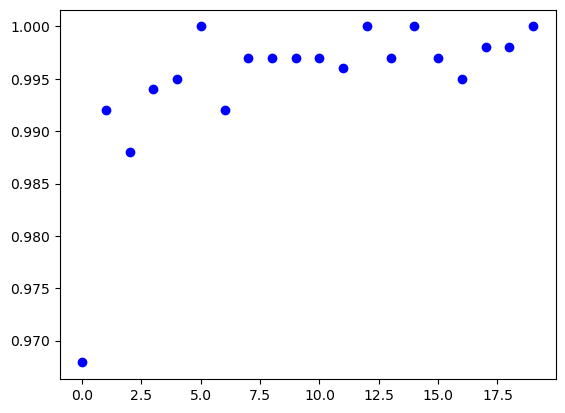

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Multi-class classifications

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

In [ ]:
# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# NLP

## Tokinization

In [7]:
# Define input sentences
sentences = ["i love my dog", "I, love my cat"]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=100)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


In [8]:
# Define input sentences
sentences = ["i love my dog", "I, love my cat", "You love my dog!"]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=1)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your input texts
sentences = [
    "I love my dog",
    "I love my cat",
    "You love my dog!",
    "Do you think my dog is amazing?",
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Tokenize the input sentences
tokenizer.fit_on_texts(sentences)

# Get the word index dictionary
word_index = tokenizer.word_index

# Generate list of token sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Print the result
print("\nWord Index = ", word_index)
print("\nSequences = ", sequences)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [10]:
# Pad the sequences to a uniform length
padded = pad_sequences(sequences, maxlen=5)

# Print the result
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [11]:
# Try with words that the tokenizer wasn't fit to
test_data = ["i really love my dog", "my dog loves my manatee"]

# Generate the sequences
test_seq = tokenizer.texts_to_sequences(test_data)

# Print the word index dictionary
print("\nWord Index = ", word_index)

# Print the sequences with OOV
print("\nTest Sequence = ", test_seq)

# Print the padded result
padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]]


In [11]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-03-18 14:51:37--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.179.155, 142.251.36.59, 216.58.208.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.179.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  6.63MB/s    in 0.8s    

2024-03-18 14:51:39 (6.63 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [27]:
import json

# Load the JSON file
with open("./sarcasm.json", "r") as f:
    datastore = json.load(f)

In [13]:
# Non-sarcastic headline
print(datastore[0])

# Sarcastic headline
print(datastore[20000])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


In [28]:
# Initialize lists
sentences = []
labels = []
urls = []

# Append elements in the dictionaries into each list
for item in datastore:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

In [15]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token="<OOV>")

# Generate the word index dictionary
tokenizer.fit_on_texts(sentences)

# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# Print the word index
print(f'word_index: {word_index}')
print()

number of words in word_index: 29657
word_index: {'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'w

In [16]:
# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding="post")

# Print a sample headline
index = 2
print(f"sample headline: {sentences[index]}")
print(f"padded sequence: {padded[index]}")
print()

# Print dimensions of padded sequences
print(f"shape of padded sequences: {padded.shape}")

sample headline: mom starting to fear son's web series closest thing she will have to grandchild
padded sequence: [  145   838     2   907  1749  2093   582  4719   221   143    39    46
     2 10736     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]

shape of padded sequences: (26709, 40)


## Embedding

In [12]:
import tensorflow_datasets as tfds

In [13]:
# Load the IMDB Reviews dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)



2024-03-18 18:01:20.279900: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Couldn't resolve host 'metadata'".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/godwin/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete57VGZ9/imdb_reviews-train.t…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/godwin/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete57VGZ9/imdb_reviews-test.tf…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/godwin/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete57VGZ9/imdb_reviews-unsuper…

Dataset imdb_reviews downloaded and prepared to /home/godwin/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [14]:
# Print information about the dataset
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp30ile9mqtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [15]:
# Print the contents of the dataset you downloaded
print(imdb)

{Split('train'): <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, Split('test'): <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>, Split('unsupervised'): <PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>}


In [16]:
# Take 2 training examples and print its contents
for example in imdb['train'].take(2):
    print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

2024-03-18 18:04:12.278998: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [17]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [26]:
len(test_data)

25000

In [18]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"


# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(
    testing_sequences, maxlen=max_length, truncating=trunc_type)

In [19]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 10

# Train the model
model.fit(padded, training_labels_final, epochs=num_epochs,
          validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 68s 83ms/step - loss: 0.6131 - accuracy: 0.6278 - val_loss: 0.3862 - val_accuracy: 0.8252
Epoch 2/10
782/782 [==============================] - 65s 83ms/step - loss: 0.2405 - accuracy: 0.9086 - val_loss: 0.4150 - val_accuracy: 0.8171
Epoch 3/10
782/782 [==============================] - 63s 80ms/step - loss: 0.0966 - accuracy: 0.9774 - val_loss: 0.4996 - val_accuracy: 0.8122
Epoch 4/10
782/782 [==============================] - 87s 112ms/step - loss: 0.0243 - accuracy: 0.9979 - val_loss: 0.5936 - val_accuracy: 0.8116
Epoch 5/10
782/782 [==============================] - 71s 90ms/step - loss: 0.0062 - accuracy: 0.9995 - val_loss: 0.6661 - val_accuracy: 0.8092
Epoch 6/10
782/782 [==============================] - 99s 127ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7251 - val_accuracy: 0.8104
Epoch 7/10
782/782 [==============================] - 80s 102ms/step - loss: 9.3965e-04 - accuracy: 1.0000 - val_loss: 0.7767 - val_ac

In [21]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(10000, 16)


In [22]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

### Visualize Word Embeddings

[projector embedding](https://projector.tensorflow.org/)


In [23]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

    # Get the word associated at the current index
    word_name = reverse_word_index[word_num]

    # Get the embedding weights associated with the current index
    word_embedding = embedding_weights[word_num]

    # Write the word name
    out_m.write(word_name + "\n")

    # Write the word embedding
    out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

## Sarcasm dataset

Hyperparameter tunning is carried out to improve training and testing accuracy

In [29]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [30]:
# Parameters for padding and OOV tokens
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(
    training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(
    testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [31]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
num_epochs = 30

# Train the model
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 24s - loss: 0.5669 - accuracy: 0.6974 - val_loss: 0.3969 - val_accuracy: 0.8348
Epoch 2/30
625/625 - 24s - loss: 0.3115 - accuracy: 0.8730 - val_loss: 0.3410 - val_accuracy: 0.8583
Epoch 3/30
625/625 - 34s - loss: 0.2342 - accuracy: 0.9098 - val_loss: 0.3429 - val_accuracy: 0.8542
Epoch 4/30
625/625 - 40s - loss: 0.1878 - accuracy: 0.9288 - val_loss: 0.3619 - val_accuracy: 0.8535
Epoch 5/30
625/625 - 36s - loss: 0.1550 - accuracy: 0.9434 - val_loss: 0.4080 - val_accuracy: 0.8427
Epoch 6/30
625/625 - 32s - loss: 0.1307 - accuracy: 0.9523 - val_loss: 0.4276 - val_accuracy: 0.8483
Epoch 7/30
625/625 - 40s - loss: 0.1133 - accuracy: 0.9612 - val_loss: 0.4639 - val_accuracy: 0.8453
Epoch 8/30
625/625 - 35s - loss: 0.0964 - accuracy: 0.9677 - val_loss: 0.5295 - val_accuracy: 0.8332
Epoch 9/30
625/625 - 35s - loss: 0.0838 - accuracy: 0.9725 - val_loss: 0.5626 - val_accuracy: 0.8334
Epoch 10/30
625/625 - 46s - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.6121 - val_accura

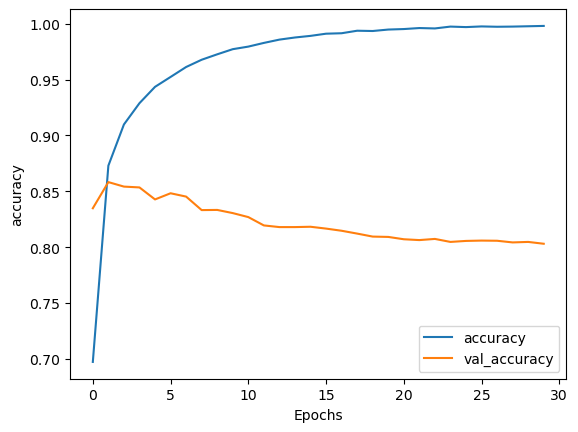

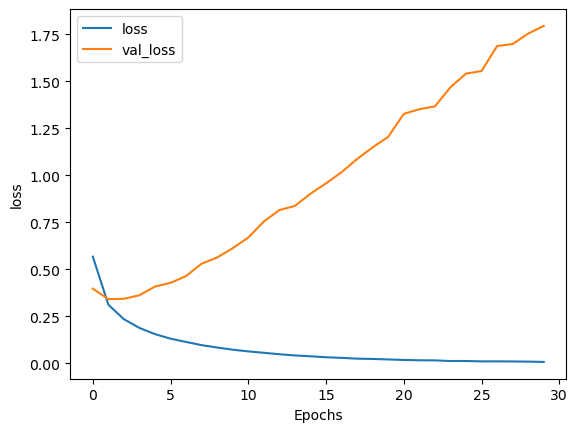

In [34]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [3]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features["text"].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/20 [00:00<?, ? shard/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /home/godwin/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


2024-03-19 11:42:53.124317: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = (
    dataset["train"],
    dataset["test"],
)

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [6]:
# Define dimensionality of the embedding
embedding_dim = 64

# Build the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [7]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs,
                    validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 59s 542ms/step - loss: 0.6925 - accuracy: 0.5171 - val_loss: 0.6881 - val_accuracy: 0.6168
Epoch 2/10
98/98 [==============================] - 55s 563ms/step - loss: 0.6833 - accuracy: 0.6233 - val_loss: 0.6624 - val_accuracy: 0.7217
Epoch 3/10
98/98 [==============================] - 50s 507ms/step - loss: 0.6462 - accuracy: 0.7294 - val_loss: 0.6013 - val_accuracy: 0.7654
Epoch 4/10
98/98 [==============================] - 50s 514ms/step - loss: 0.5715 - accuracy: 0.7834 - val_loss: 0.5334 - val_accuracy: 0.7759
Epoch 5/10
98/98 [==============================] - 51s 519ms/step - loss: 0.4956 - accuracy: 0.8196 - val_loss: 0.4649 - val_accuracy: 0.8304
Epoch 6/10
98/98 [==============================] - 64s 659ms/step - loss: 0.4305 - accuracy: 0.8453 - val_loss: 0.4204 - val_accuracy: 0.8456
Epoch 7/10
98/98 [==============================] - 48s 482ms/step - loss: 0.3819 - accuracy: 0.8699 - val_loss: 0.3850 - val_accuracy: 0.8577

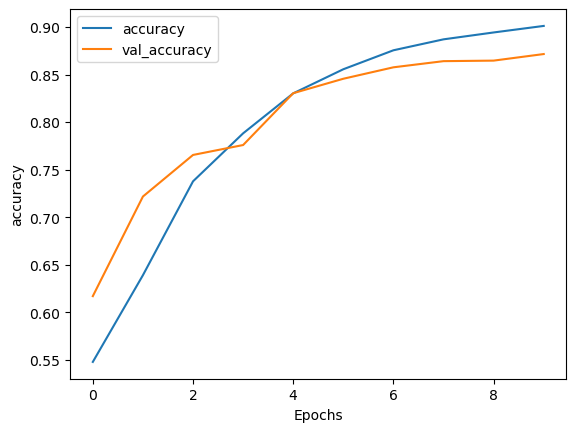

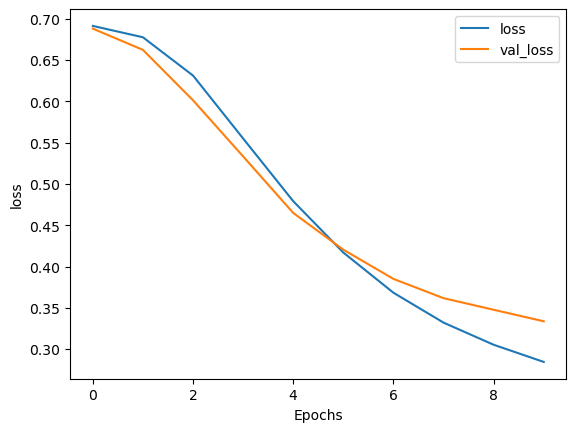

In [8]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Single Layer LSTM

In [5]:
# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64
# Get the tokenizer
tokenizer = info.features["text"].encoder
# Build the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
        tf.keras.layers.Dense(dense_dim, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# Print the model summary
model.summary()

2024-03-19 11:43:27.508400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-19 11:43:27.510681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-19 11:43:27.512317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


2024-03-19 11:43:28.474894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-19 11:43:28.477546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
	 [[{{node gradients/split_1_grad/concat/split_1/split_dim}}]]


In [6]:
# Set the training parameters
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS,
                    validation_data=test_dataset)

Epoch 1/10


2024-03-19 11:43:49.844012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10]
	 [[{{node Placeholder/_0}}]]
2024-03-19 11:43:49.844640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10]
	 [[{{node Placeholder/_0}}]]
2024-03-19 11:43:50.871820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with

     63/Unknown - 1353s 21s/step - loss: 0.6290 - accuracy: 0.6183

KeyboardInterrupt: 

In [ ]:
# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Multiple Layer LSTM

In [ ]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## CNN

In Course 2, you were using 2D convolution layers because you were applying it on images. For temporal data such as text sequences, you will use Conv1D instead so the convolution will happen over a single dimension. You will also append a pooling layer to reduce the output of the convolution layer. For this lab, you will use GlobalMaxPooling1D to get the max value across the time dimension. You can also use average pooling and you will do that in the next labs. See how these layers behave as standalone layers in the cell below.

In [ ]:
# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Word Prediction

In [7]:
# Define the lyrics of the song
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [8]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f"word index dictionary: {tokenizer.word_index}")
print(f"total words: {total_words}")

word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

## Preprocessing the Dataset
Next, you will be generating the training sequences and their labels. As discussed in the lectures, you will take each line of the song and generate inputs and labels from it.

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Loop over the line several times to generate the subphrases
    for i in range(1, len(token_list)):

        # Generate the subphrase
        n_gram_sequence = token_list[: i + 1]

        # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")
)

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

Let's see the result for the first line of the song. The particular line and the expected token sequence is shown in the cell below:



In [11]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
    token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [14]:
# Build the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(
            total_words, 64, input_length=max_sequence_len - 1),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(total_words, activation="softmax"),
    ]
)

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

# Print the model summary
model.summary()

2024-03-19 14:54:26.758711: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-19 14:54:26.768557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-19 14:54:26.775951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
history = model.fit(xs, ys, epochs=100)

Epoch 1/100
15/15 [==============================] - 2s 137ms/step - loss: 4.9199 - accuracy: 0.0618
Epoch 2/100
15/15 [==============================] - 2s 99ms/step - loss: 4.8861 - accuracy: 0.0596
Epoch 3/100
15/15 [==============================] - 1s 102ms/step - loss: 4.8435 - accuracy: 0.0574
Epoch 4/100
15/15 [==============================] - 1s 76ms/step - loss: 4.8009 - accuracy: 0.0662
Epoch 5/100
15/15 [==============================] - 1s 67ms/step - loss: 4.7577 - accuracy: 0.0684
Epoch 6/100
15/15 [==============================] - 1s 77ms/step - loss: 4.7013 - accuracy: 0.0684
Epoch 7/100
15/15 [==============================] - 1s 96ms/step - loss: 4.6514 - accuracy: 0.0773
Epoch 8/100
15/15 [==============================] - 1s 95ms/step - loss: 4.5951 - accuracy: 0.0684
Epoch 9/100
15/15 [==============================] - 1s 87ms/step - loss: 4.5415 - accuracy: 0.0817
Epoch 10/100
15/15 [==============================] - 1s 97ms/step - loss: 4.4847 - accuracy: 0.09

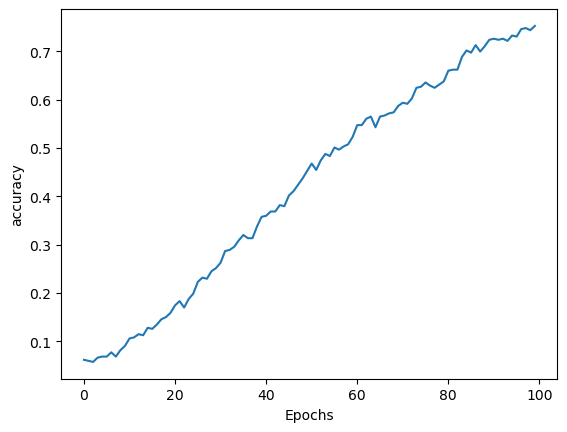

In [19]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


# Visualize the accuracy
plot_graphs(history, "accuracy")

In [20]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index.
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result
print(seed_text)

2024-03-19 14:59:20.511390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-19 14:59:20.515656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-19 14:59:20.517965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 46ms/step
Laurence went to Dublin in dublin plenty as water water water again entangled glisten glisten mchugh again entangled wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall wall


In the output above, you might notice frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, you will get the top three indices and choose one at random. See if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three. Feel free to improve it and of course, you can also develop your own method of picking the next word.

In [21]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice([1, 2, 3])

    # Sort the probabilities in ascending order
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index.
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 116ms/step
Laurence went to Dublin and boys a might rose mchugh ask glisten mchugh mchugh mchugh entangled glisten make glisten eyes relations all again relations glisten glisten make glisten your hall glisten eyes ball the make eyes eyes relations and three at entangled i same i plenty again in might ask ask rose rose mchugh mchugh glisten further ball relations make glisten your eyes glisten entangled again entangled again i make your make eyes make eyes hoops glisten glisten painted make eyes entangled she eyes and fainted and ten put suppose suppose might ask your polkas make your make glisten glisten eyes glisten she three
